## 介绍

本部分简单介绍因果推断的基本概念和方法。包括两种因果推断的框架。



+ https://www.math.pku.edu.cn/xyxw/132266.htm (Simpson悖论)

+ Simpson悖论 1 
 

![covid](./figures/simpsoncovid.png)

+ Simpson悖论 2

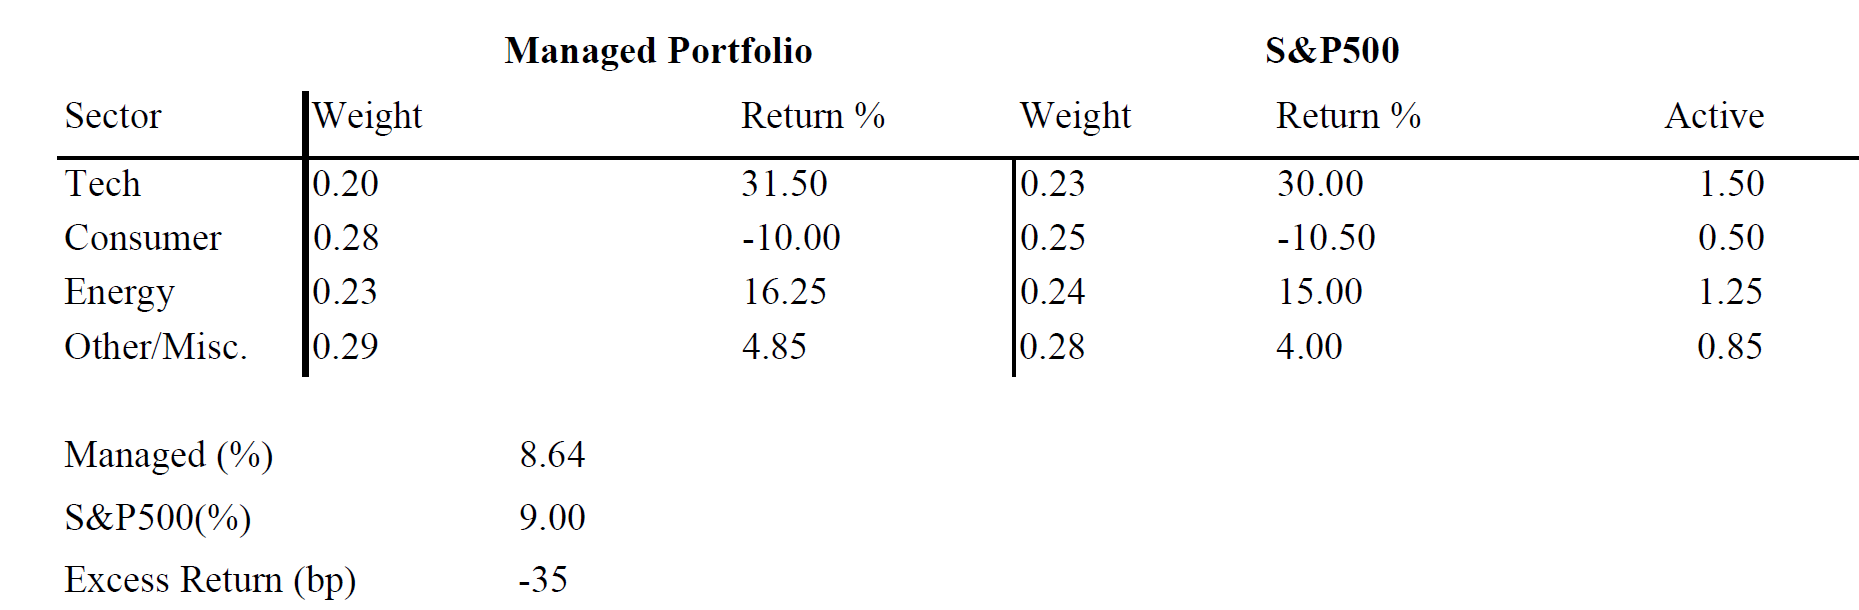

## 分析数据

![nobels.jpg](./figures/nobels.jpg)

![butterandsp.jpg](./figures/butterandsp.jpg)

![autism.png](./figures/autism.png)

## 为什么要因果推断

+ 机器学习算法常见的目标是进行预测，进行有监督的学习。
+ 其利用观察数据发现从输入\特征变量 $X$ 到 输出\响应变量 $Y$的映射进行预测。该映射揭示了输入和输出之间的潜在模式\结构。
+ 然而，学习算法通常是挖掘输入和输出之间的相关关系，其目的并不是发现$X$对$Y$的确定(因果，生成)机制，可能不能发现因果关系。比如
  - 公鸡叫和太阳升，
  - 啤酒和尿布销量
  - 冰激凌销量和溺水数量
+ 如果要进行决策干预，需要预测的是干预改变$X$为特定值后$Y$的可能值。



+ 如何理解干预后的可能值
   + 做实验，干预X，然后观测Y，
   + 没有实验， 对一个个体来说，通常没有重复观察，他的$X$ 取某值后就不可能取另一个值。比如评估药物的疗效，个体只能接受或者不接受治疗。也就是可能有一个虚拟事实存在，他在现实世界是观察不到的。即涉及到所谓“虚拟事实”

下面一些问题，在决策场景下，通常涉及估计虚拟事实
+ 决策是否有效？总效应是多少？
  - 一个政策是否能改变人们的收入
  - 进步奖学金是否能提高学生成绩
  - 系统推荐对购买的影响多少
+ 决策为什么有效？
  - 是什么导致收入的改变
  - 进步奖学金是如何提高学习成绩的
  
+ 我们应该做什么决策？
  - 有什么提高收入的方法
  
+ 决策会对什么量产生影响？
   
   - T+1 如果改为T+0 会对市场产生什么影响
  
+ 回答这些问题都需要因果推理。存在很多因果推断的方法，他们有不同的理论基础和假设。

+ 关于因果的谚语
　　　
    + 我宁愿发现一条因果律也不愿成为波斯国王。  --- 德谟克利特   
    + 我们直到把握了事物的原因，才能真正了解它。---  亚里士多德

+ 传统统计学

    + 相关性不等于因果关系    
    +　你不能用统计学证明因果关系

## 两种框架

+ potential outcome models (Neyman,Rubin), causal graphical models (Pearl)

 
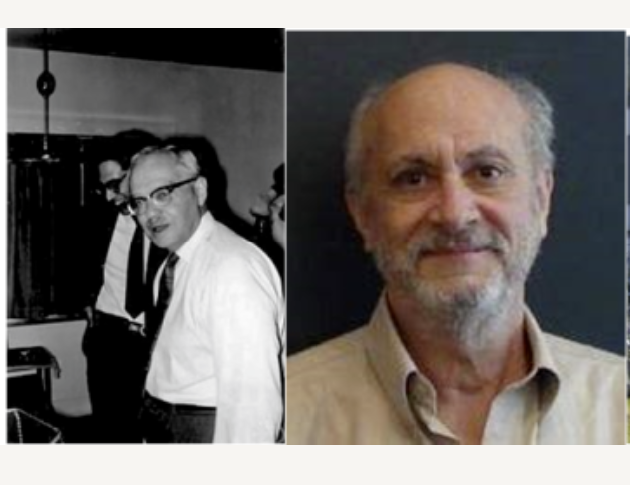
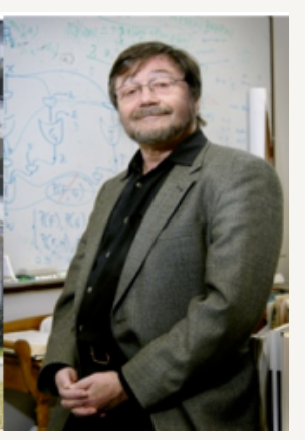

# 潜在结果（虚拟事实）模型

+ $i$表示个体，$Z$是处理变量，取值0，1，$Y$是响应结果变量。
+ 个体因果效应的数学定义
  + 对每个个体$i$, $Y$有两种结果：
  $$Y_i(0)\text{ and } Y_i(1),$$
  假定这是两个客观存在的量，只是我们通常不能同时观察他们。个体因果效应就是个体$i$接受处理和不接受处理的响应之差。
  $$\tau_i=Y_{i}(1)- Y_{i}(0).$$
     + 假设每个个体都有潜在量，如果恰好观察到$Z_i=0$，如果我们有$Y_{i}(0)=Y_i$(这个仍然是假设)。通常情况下，对单个个体，我们不能既观察到 $Y_{i}(0)$,又观察到 $Y_{i}(1)$.因此个体因果效应通常不可估计。
     

+ 平均因果效应(ATE)： 考虑关心总体的因果效应
    + 假设 $$X_i,Z_i,Y_i(1),Y_i(0)\sim_{iid} \{X,Z,Y(1),Y(0)\},$$
       
    + 平均因果效应定义为：   $$\tau =E[Y{(1)}- Y{(0)}].$$
       
+ 条件因果效应(CATE)
  $$\tau_x =E[Y(1)|X=x]- E[Y(0)|X=x].$$
      
+ 潜在结果模型框架研究估计 $\tau$或 $\tau_x$ 的实验方法，可识别性条件，估计方法，假设检验等问题。
  

#### 困难在哪里？
 
+ 很多情况下，个体因果效应是不可识别的， 而平均因果效应 $E[Y(1)-Y(0)]$可能能识别

+ 我们先理解：

Z| 潜在 Y(0) | 潜在Y(1)   | 可以计算的条件期望
-----|-----|-----|------
0|看到 $Y(0)$ | 没看到 Y(1) | $E(Y|Z=0)$
1|没看到 Y(0) |看到 $Y(1)$ | $E(Y|Z=1)$



+ 如果Z=1和Z=0的群体特质不一样，即有可能：
$$E(Y(0))\neq E(Y|Z=0),E(Y(1))\neq E(Y|Z=1)$$
注意：$$E(Y(0))=E(Y(0)|Z=0)P(Z=0)+E[Y(0)|Z=1]P(Z=1)=E(Y|Z=0)P(Z=0)+E[Y(0)|Z=1][1-P(Z=0)].$$
如果要$E(Y(0))= E(Y|Z=0)$,必须满足 $$E(Y|Z=0)=E[Y(0)|Z=1]，$$即看到的和没有看到的期望要一样。

+ 因此，处理Z分配的（赋值的）机制非常关键。

####  为什么随机实验数据可以识别平均因果效应 

+ 随机化是评估因果效应的经典的金标准！

+ 完全随机实验，从总体中随机选一部分接受处理$Z=1$，另一部分接受处理$Z=0$。因为 <span style="color:red">$Z \perp\kern-5pt\perp \{Y(0),Y(1)\}$ </span>  ,有  

$$E[Y(1)]=E[Y(1)|Z=1)=E(Y|Z=1);$$
$$E[Y(0)]=E[Y(0)|Z=0)=E(Y|Z=0).$$
+  <span style="color:red">$Z \mathrel{\unicode{x2AEB}} \{Y(0),Y(1)\}$</span> 叫 **可忽略性(ignorability)**，其是因果效应可以识别的关键。有了这个关键假设（还有其他暗含假设），看不见的就可以通过看见的估计了。

+ 可忽略性不成立，也是大多数观测数据不能估计(识别)因果效应的原因。
+  在回归模型$y=a+bx+e$中，这个类似于要求 $cov(x,e)=0$.

+ 这个假设之所以被称为"ignorability"，是因为它允许研究人员在进行因果估计时“忽略”处理赋值机制。换句话说，如果满足可忽略性假设，那么处理赋值的方式（如随机或非随机）不会影响因果效应的估计。  

#### 观察数据识别因果

 
+ 对非完全随机实验或者观测数据，在假设  <span style="color:red">$Z \perp\kern-5pt\perp \{Y(0),Y(1)\}|X$ </span> 下， 估计因果效应$E[Y(1)-Y(0)]$,
$$E(Y(1)|X)=E(Y|Z=1,X)$$
$$E(Y(0)|X)=E(Y|Z=0,X)$$ 
+  平均因果效应： 
\begin{align*}
\tau=E(Y(1) - Y(0)) 
&= \sum_{X} E(Y(1)|X) P(X) - \sum_{X} E(Y(0)| X) P(X) \\
&= \sum_{X} E(Y(1) | Z = 1, X) P(X) - \sum_{X} E(Y(0) | Z = 0, X) P(X) \\
&= \sum_{X} E(Y| Z = 1, X) P(X) - \sum_{X}E(Y  | Z = 0, X) P(X)
\end{align*}
+ 这个叫 g-formula 

##### 分配机制

+ 分配机制非常重要，其由倾向得分(propensity score)定义$$e(X)=pr(Z=1|X).$$
+ Rosenbaum and Rubin (1983): The central role of the propensity score in observational studies for causal effects:

+ **Theorem 1**:  
 
 $$\text{ If } Z \perp\kern-5pt\perp \{Y(0),Y(1)\}|X,\text{then } Z \perp\kern-5pt\perp \{Y(0),Y(1)\}|e(X)$$
 
+ 倾向得分是概率，可以按其分层，然后用g-formula计算因果效应，Rosenbaum等推荐 K=5  

Mark

####  Inverse propensity score weighting(IPW)
+ **Theorem 2**：
 $\text{ If } Z \perp\kern-5pt\perp \{Y(0),Y(1)\}|X,\text{and } 0 <e(X)<1$，then
 $$E\{Y(1)\}=E\left\{ ZY\over e(X)  \right\},\quad E\{Y(0)\}=E\left\{ (1-Z)Y\over 1-e(X)  \right\},$$
 and
 $$\tau = E\{Y(1) - Y(0)\} = E\left\{ \frac{ZY}{e(X)} - \frac{(1-Z)Y}{1-e(X)} \right\}
$$
证明：image from ding peng's book
![IPWproof.png](./figures/IPWproof.png)

####  Inverse propensity score weighting(IPW)

+ 由 $$\tau = E\{Y(1) - Y(0)\} = E\left\{ \frac{ZY}{e(X)} - \frac{(1-Z)Y}{1-e(X)} \right\}$$
+ 可给出估计IPW estimator：
  $$\hat{\tau}=  \frac{1}{n}\sum_{i=1}^n \frac{Z_iY_i}{\hat{e}(X)} -  \frac{1}{n}\sum_{i=1}^n\frac{(1-Z_i)Y_i}{1-\hat{e}(X)},$$
+ 缺点：
    - 对靠近0，和1的e(X)特别敏感
    - 对Y的平移缺乏不变性，即将$Y_i$变为$Y_i+c$，因果效应是差值，应该不变，但估计量改变了。


### 双稳健估计
$\tau = E\{Y(1) - Y(0)\}$
+ 响应的回归方法，
如果我们对$EY(1)$, $ EY(0)$分别进行回归，利用X估计它们。可以改写为
$$\tau = E\{\mu_1(X) - \mu_0(X)\},$$
 其中 $\mu_1(X)=E\{Y(1)|X\}=E\{Y|Z=1,X\},\mu_0(X)=E\{Y(0)|X\}=E\{Y|Z=0,X\}$
 - 对处理Z=1,和Z=0的群体的Y分别进行建模：$\mu_1(X,\beta_1)$和$\mu_0(X,\beta_0)$是两个群体的参数模型。
 $$\hat \tau_r =E\mu_1(X,\beta_1)-E\mu_0(X,\beta_0)$$
 如果模型正确，我们有：$\mu_1(X,\beta_1)=\mu_1(X)$和$\mu_0(X,\beta_0)=\mu_0(X)$,因果效应的估计就是对的。
+ 倾向得分方法，倾向得分也需要估计$\hat{e}(X)$, 进而得到IPW估计 $$\hat{\tau}=  \frac{1}{n}\sum_{i=1}^n \frac{Z_iY_i}{\hat{e}(X)} -  \frac{1}{n}\sum_{i=1}^n\frac{(1-Z_i)Y_i}{1-\hat{e}(X)},$$

+ 不能保证那种方法得到的估计是正确的。如何组合，形成双稳健估计，确保只要有一种方法是正确的，估计就是对的。

### 双稳健估计

$$\tilde{\mu}_1^{dr}=E\left[\frac{Z\{Y-\mu_1(X,\beta_1)\}}{e(X,\alpha)}+\mu_1(X,\beta_1)\right]$$

$$\tilde{\mu}_0^{dr}=E\left[\frac{Z\{Y-\mu_0(X,\beta_0)\}}{e(X,\alpha)}+\mu_0(X,\beta_0)\right]$$

结论： 如果 $e(X,\alpha)=e(X)$ 或者 $\mu_1(X,\beta_1)=\mu_1(X),\mu_0(X,\beta_0)=\mu_0(X)$, 那么，$\tilde{\mu}_1^{dr}=E(Y(1)),\tilde{\mu}_0^{dr}=E(Y(0))$,$\tau$的估计也是对的。

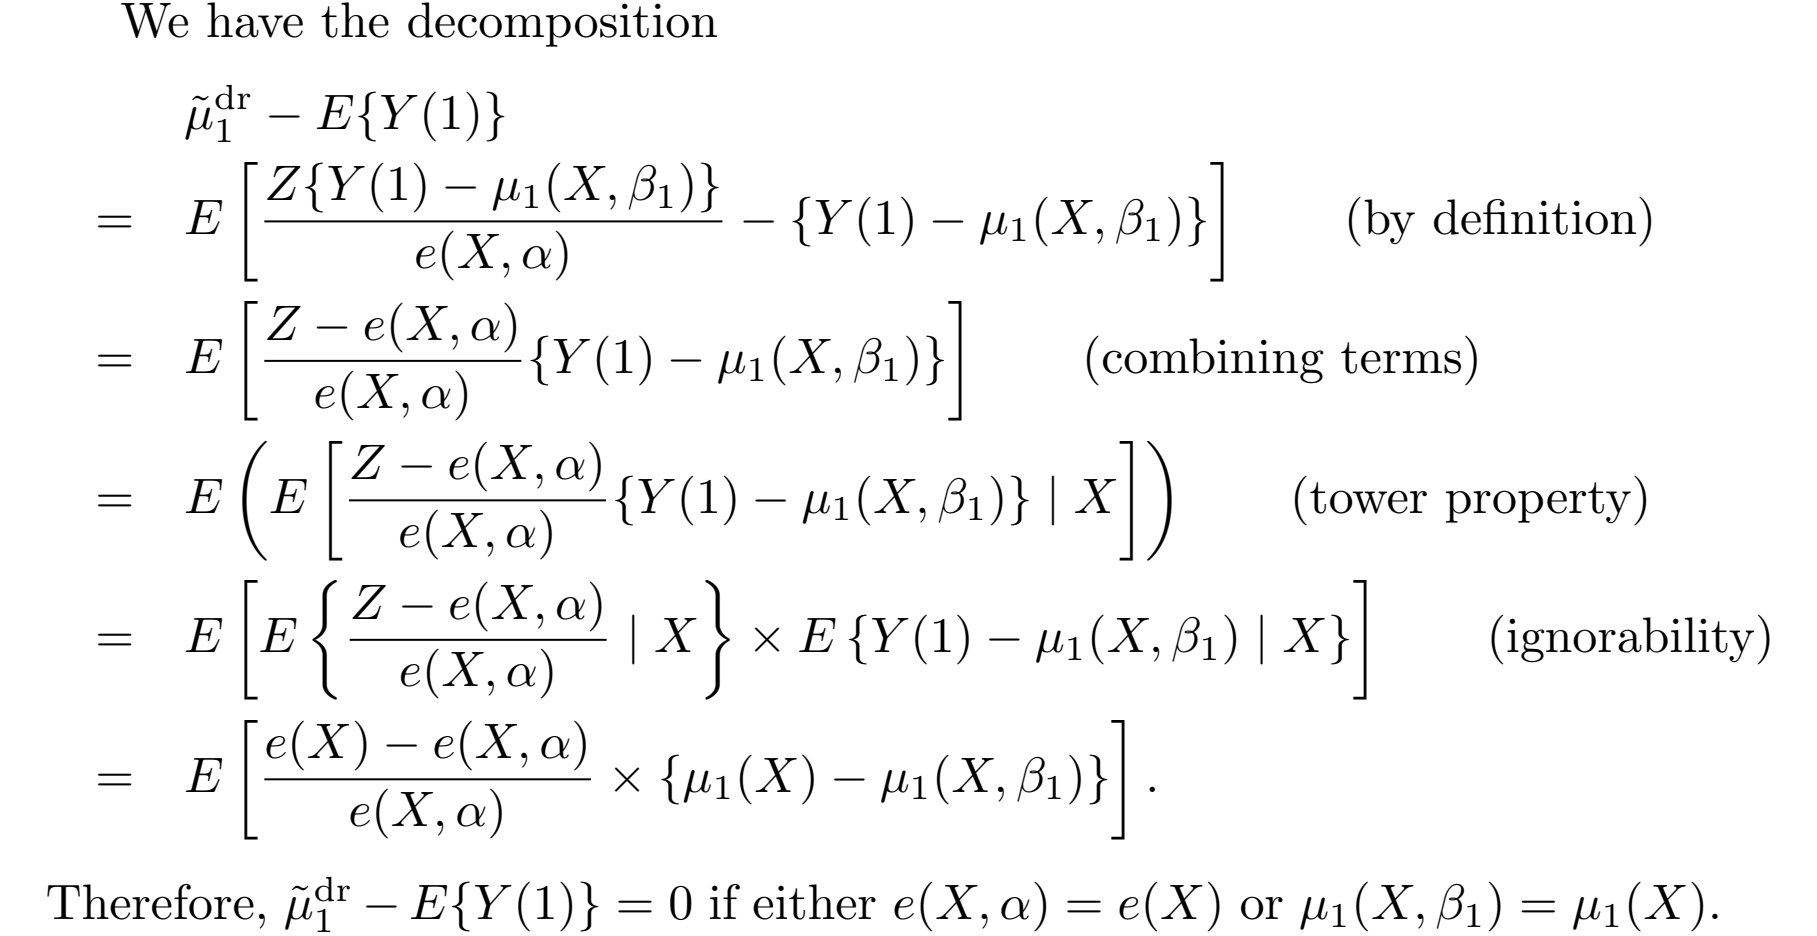

### 工具变量方法

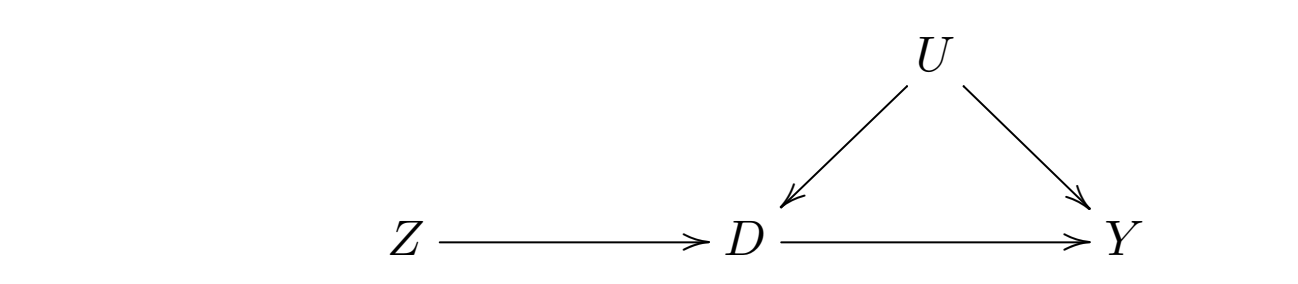

+ 估计D对Y的因果效应，但又U是共同原因，没有观测到。 ignorability不满足！
+ 寻找一个工具变量，实现因果效应的估计。

+ 满足：
    - Z尽可能是随机的，因此能独立与U
    - Z能改变D的分布，即Z和相关
    - Z对Y的影响只能通过D发生，没有直接影响



### 工具变量方法，离散

+ 当Z和D都是二值的情形：

该问题等价与经典的随机化实验中不依从的问题，或者鼓励实验问题。就是随机化实验Z不能完全确定处理的赋值。

比如在药物实验中，如果分配到处理组的人不吃药，或者分配到安慰剂组的却吃了药，这种行为叫不依从。而在鼓励性实验中，随机化Z只是处理D的鼓励措施，接受鼓励的个体未必会接受处理，比如研究评估培训项目的效果，可以随机发放培训费代金券，鼓励他们参加培训。



在这些情况下，研究表明，在**一定条件下**，依从的人群的因果效应是可以估计的。

**Definition** (CACE or LATE) Define $$\tau_c=E\{Y(1)-Y(0)|U=c\}=E\{Y(1)-Y(0)|D(1)=1,D(0)=0\}$$ as the "complier average cusal effect" or the "local averge treatment effect"
 

### 工具变量方法，线性（D是连续的）

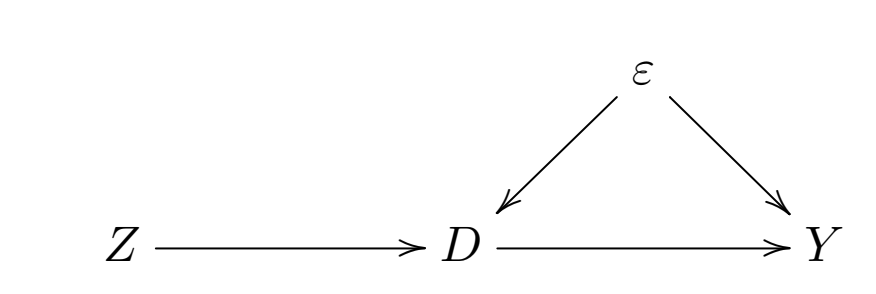

$$Y=D^T\beta+\varepsilon, \text{ with } E(\varepsilon Z)=0$$


+ 都是连续的，$$\beta=\frac{cov(Z,Y)/var(Z)}{cov(Z,D)/var(Z)}$$
+ Z是两值的，$$\beta=\frac{E(Y|Z=1)-E(Y|Z=0)}{E(D|Z=1)-E(D|Z=0)}$$

估计的方法为：两阶段最小二乘

+ 第一步，对D做Z的回归，估计得到$\hat D$,$\hat D$是Z的函数，因此与U独立
+ 第二步，利用Y对$\hat D$做回归，回归系数就是真实的因果系数




### 因果图模型(Pearl)

#### 干预定义因果

 
+ 实验，干预 do 运算
+ 因果关系，$P(Y|do(Z=1))\neq P(Y|do(Z=0))$  
+  通常 $P(Y|do(Z=1)\neq P(Y|Z=1)$
+ Intervention  and causation

   C causes E if and only if  it is possible to intervene to  change  the value of C, in such a way that if that  intervention were to occur, the  value of E or the probability distribution of  E   would change. 

  

###  概率图模型 （贝叶斯网络）

 Bayesian 网络是最常见的概率图模型，其由两部分构成，一部分是DAG，一部分是条件概率表
 
 ![image-2.png](./figures/student.png) 


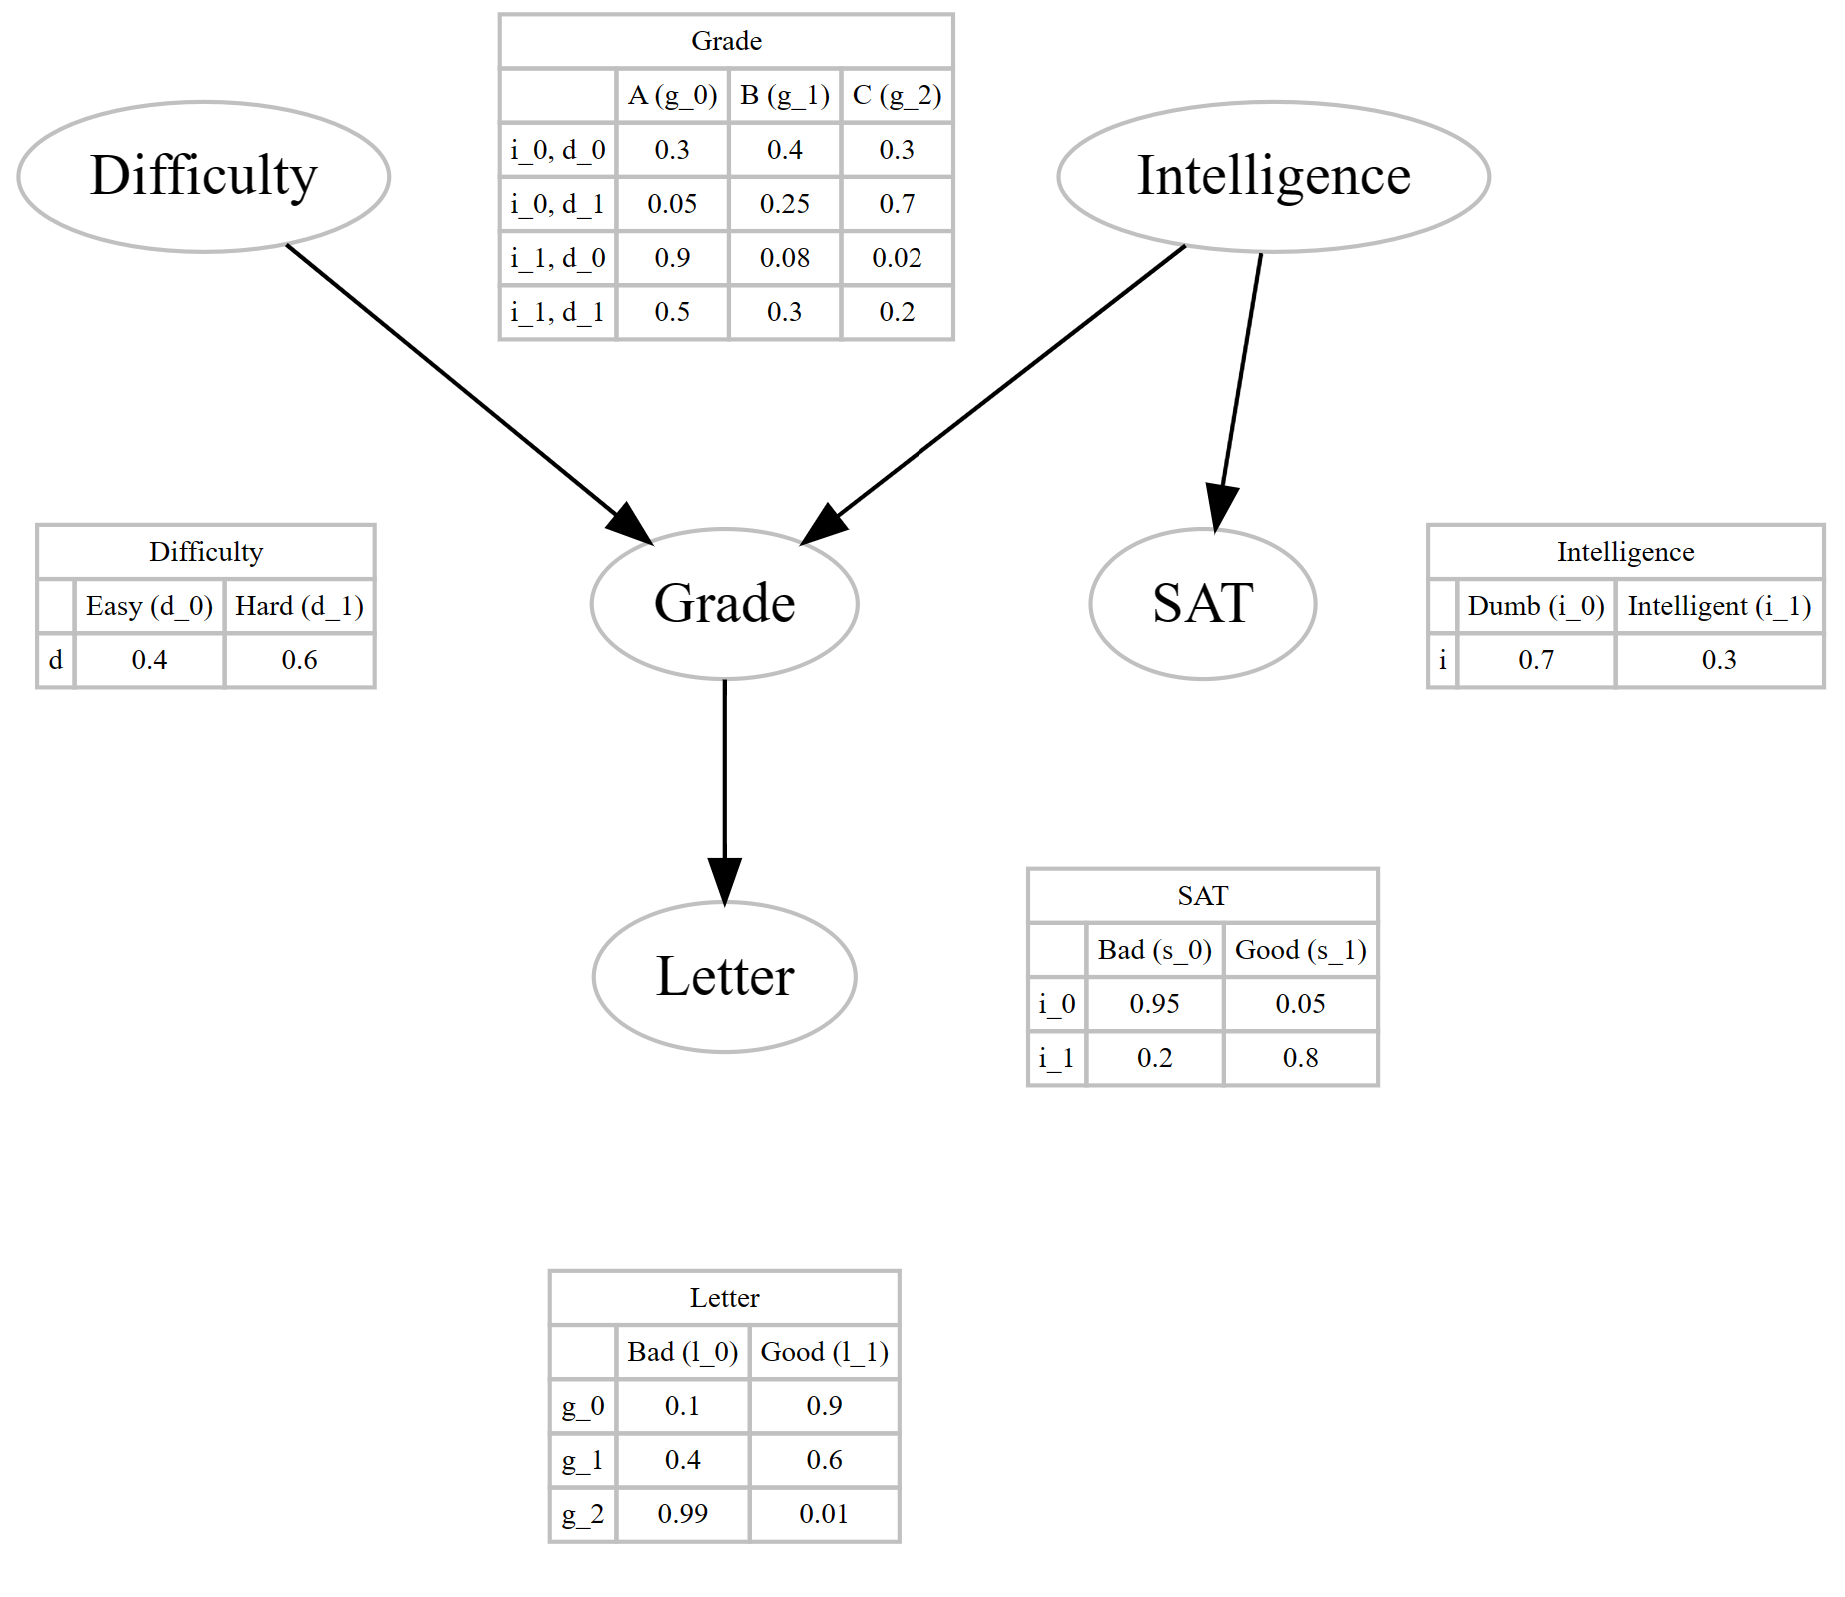 


 通常利用链式法则求联合分布:

$$P(D,I,G,S,L) = P(L|S,G,I,D) P(S|G,I,D) P(G|I,D) P(I|D) P(D)$$

如果模型可以用如上的Bayesian network 表示，则联合分布可以表示为:

$$P(D,I,G,S,L) = P(L|G) P(S|I) P(G|I,D) P(I) P(D))$$
可以比较一下参数数量，联合分布一共有  $2*2*3*2*3=72$ 个参数，但贝叶斯网络只需要 15个参数。

####  因果图模型

+ DAG表示的因果结构 

+ 直接原因到结果的因果机制（模型：函数或者条件概率表）




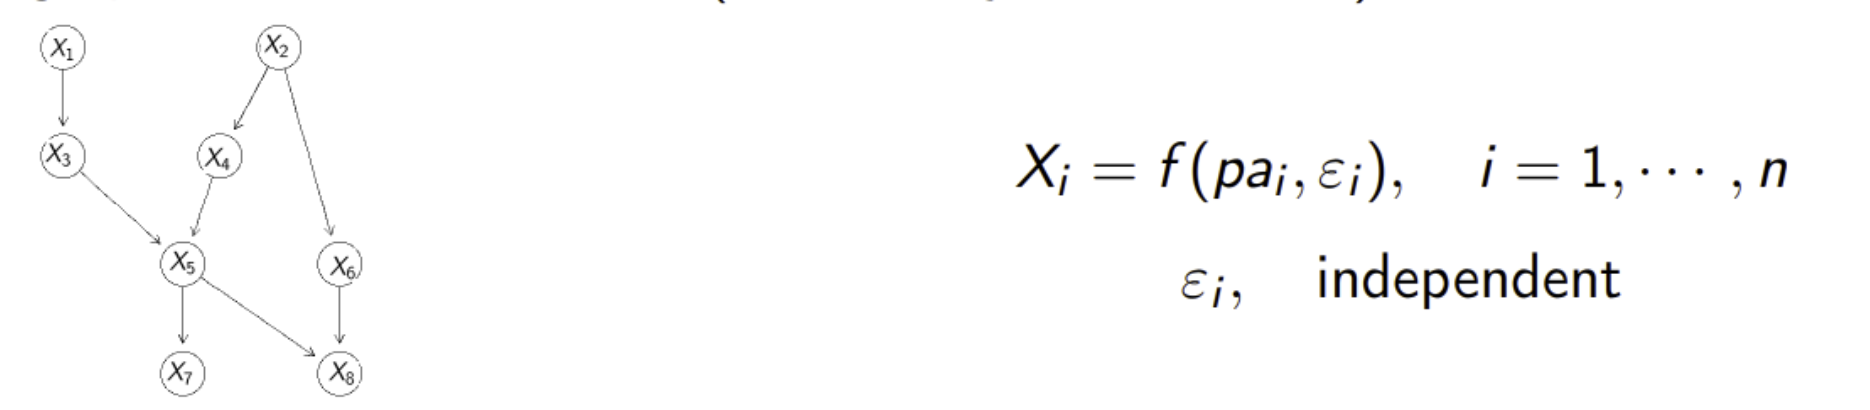

由模型设定，可以得出下面的一些结论：

1.局部Markov性：给定其父亲节点，任何一个变量和其非后代节点独立，写为：$$ (X_i \perp\kern-5pt\perp  NonDesc(X_i) | Pa(X_i) $$
where $NonDesc(X_i)$ 是 $X_i$的非后代，$Pa(X_i)$是  $X$ 的父节点集合，即直接原因集合。

2. 联合分布也可以分解：
$$P(X_1,\cdots,X_p)=\prod_{i=1}^p P(X_i|Pa(X_i)). $$
+ do运算
  + do 运算，即干预，其阻断了变量原因对它的影响

<div style="display: flex; justify-content: center;">    
  <img src="./figures/twopath.png" alt="onechain" style="width: 10%; margin-right: 10%;">    
  <img src="./figures/doz.png" alt="twopath" style="width: 20%;">    
</div>


## Markov性（独立性）与因果关系

+ 相关性（独立性）和因果的关系

  + 两个变量相关不意味存在因果关系
  + 两个变量有因果关系，他们之间一定有相关关系吗？
  
       + 答案是：也不一定。
  
  + 下面给两个例子：左边的如果因果效应Z到D有，D到Y有，那么Z和Y一定是相关的。右边的则未别，因为有两条路径，他们可能相互抵消。
  
<div style="display: flex; justify-content: center;">    
  <img src="./figures/chains.png" alt="onechain" style="width: 10%; margin-right: 10%;">    
  <img src="./figures/twopath.png" alt="twopath" style="width: 10%;">    
</div>
  
+  <font size=5> 不过相互抵消的情形通常是小概率事件，在需要时可以假设其不存在,   **即假设因果一定导致相关** 

    

#### 因果结构和独立性

+ 两个变量的三种结构

 <div style="display: flex; justify-content: center;">    
  <img src="./figures/twov1.png" alt="twov1" style="width: 5%; margin-right: 10%;">  
   <img src="./figures/twov2.png" alt="twov2" style="width: 10%; margin-right: 10%;"> 
  <img src="./figures/twov3.png" alt="twov3" style="width: 10%;">    
</div>

+ $$ X \not\perp\kern-7pt\perp Y,\hspace{8cm} X \not\perp\kern-7pt\perp Y,\hspace{8cm} X \perp\kern-5pt\perp Y $$
+ 三个变量的三种基本结构

 <div style="display: flex; justify-content: center;">    
  <img src="./figures/chains.png" alt="onechain" style="width: 10%; margin-right: 10%;">  
   <img src="./figures/commoncause.png" alt="commoncause" style="width: 20%; margin-right: 10%;"> 
  <img src="./figures/vstr.png" alt="vstr" style="width: 20%;">    
</div>

+ $$ X \perp\kern-5pt\perp Y|Z,\hspace{8cm}  Z\perp\kern-5pt\perp Y|X,\hspace{8cm} X \perp\kern-5pt\perp Y,X \not\perp\kern-7pt\perp Y|Z $$

### 如何从因果图中读出(条件)独立性，D-Separation(d分离)。 
 

给定一个贝叶斯网络 $BN$，我们能得到任意两个变量的条件独立性。 

 几条规则 

+ X,Y由一条路径连接，中间如果没有碰撞点，则X,Y不独立，如果给定路径中的中间节点Z，X，Y由这条路径带来的相关性被Z阻断


+ X,Y由一条路径连接，中间如果碰撞点，则该路径本身时阻断的。


+ X,Y由一条路径连接，中间如果碰撞点Z，如果给定Z,或者Z的后代，则该路径Z处的阻断被连通。

+ http://bayes.cs.ucla.edu/BOOK-2K/d-sep.html
+ D-connection(d-连接)， D-Separation(d分离)的定义：

+ D-connection:

**If G is a directed graph in which X, Y and Z are disjoint sets of vertices, then X and Y are d-connected by Z in G if and only if there exists an undirected path U between some vertex in X and some vertex in Y such that for every collider C on U, either C or a descendent of C is in Z, and no non-collider on U is in Z.**

**X and Y are d-separated by Z in G if and only if they are not d-connected by Z in G.**

+ 请读其中蕴含的独立/不独立性，条件独立/不独立里，圈起来的是条件Z

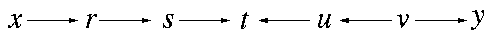
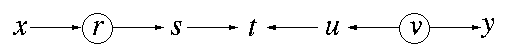
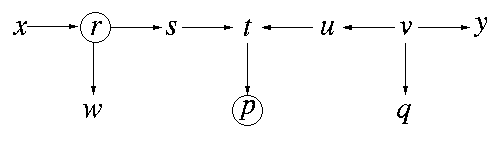


###  三种画图工具

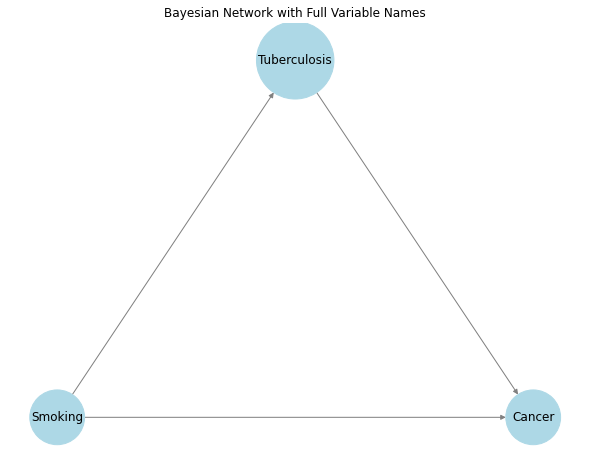

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#from pgmpy.models import BayesianNetwork

# 创建贝叶斯网络
structure=[("S", "T"), ("T", "C"), ("S", "C")]
#simp_model = BayesianNetwork([("S", "T"), ("T", "C"), ("S", "C")])

# 定义简写与全称的映射
full_names = {
    "S": "Smoking",
    "T": "Tuberculosis",
    "C": "Cancer"
}

# 创建一个新的 networkx 图
G = nx.DiGraph(structure)
 
mapping = {node: full_names[node] for node in G.nodes()}
H = nx.relabel_nodes(G, mapping)

# 设置图形大小
plt.figure(figsize=(8, 6))  # 可以调整这里的尺寸以适应您的需求

# 绘制图形
#pos = nx.spring_layout(H)  # 使用spring布局
# 手动指定节点位置
pos = {
    "Smoking": (0, 1),
    "Tuberculosis": (1, 2),
    "Cancer": (2, 1)
}

nx.draw(H, pos, with_labels=True, node_color='lightblue', edge_color='gray',node_size=(3000,6000,3000))
plt.title("Bayesian Network with Full Variable Names")
plt.show()


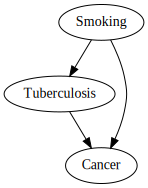

In [2]:
from graphviz import Digraph
# graphviz 主要关注于自动布局。
# 定义结构
structure = [("S", "T"), ("T", "C"), ("S", "C")]

# 创建有向图
dot = Digraph()

# 添加具有全称的节点,如果不需要全称，可以不需要下面两行
for node in full_names:
    dot.node(node, full_names[node])

# 添加边
for start, end in structure:
    dot.edge(start, end)

# 显示图形
dot

<Axes:>

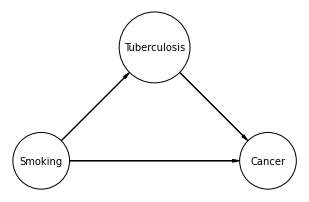

In [3]:
 
import daft
pgm = daft.PGM(aspect=1)

nodes=["S","T","C"]
structure=[("S", "T"), ("T", "C"), ("S", "C")]
# 定义节点的全称，位置和大小

full_names = {
    "S": "Smoking",
    "T": "Tuberculosis",
    "C": "Cancer"
}

pos = {
    "S": (0, 2),
    "T": (2, 4),
    "C": (4, 2)
}

sizes = {'S': 2, 'T': 2.5, 'C': 2}


# 添加节点
for node in nodes:
    pgm.add_node(node, full_names[node], *pos[node], scale=sizes[node])

# 添加边
for edge in structure:
    pgm.add_edge(*edge)

# 渲染和显示图形
pgm.render()




#### pgmpy包

In [4]:
#  pgmpy包, prob graph model 

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# 定义网络结构
model = BayesianNetwork([
    ("EconomicIndicator", "MarketSentiment"),
    ("EconomicIndicator", "CompanyEarnings"),
    ("MarketSentiment", "StockPriceChange"),
    ("MarketSentiment", "InvestmentStrategy"),
    ("CompanyEarnings", "StockPriceChange"),
    ("StockPriceChange", "InvestorReturns"),
    ("InvestmentStrategy", "InvestorReturns")
])

# 定义条件概率表，2: Positive, 0: Negative, 1: Neutral
cpd_economic_indicator = TabularCPD(variable="EconomicIndicator", variable_card=3, values=[[0.5], [0.3], [0.2]])
cpd_market_sentiment = TabularCPD(variable="MarketSentiment", variable_card=3, values=[[0.6, 0.2, 0.4], [0.3, 0.6, 0.4], [0.1, 0.2, 0.2]], evidence=["EconomicIndicator"], evidence_card=[3])
cpd_company_earnings = TabularCPD(variable="CompanyEarnings", variable_card=3, values=[[0.5, 0.3, 0.4], [0.3, 0.5, 0.4], [0.2, 0.2, 0.2]], evidence=["EconomicIndicator"], evidence_card=[3])
cpd_stock_price_change = TabularCPD(variable="StockPriceChange", variable_card=3, values=[[0.5, 0.4, 0.3, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2], [0.3, 0.4, 0.5, 0.4, 0.5, 0.6, 0.3, 0.4, 0.5], [0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]], evidence=["MarketSentiment", "CompanyEarnings"], evidence_card=[3, 3])

# 两分类的变量，1: Positive, 0: Negative
cpd_investment_strategy = TabularCPD(variable="InvestmentStrategy", variable_card=2, values=[[0.6, 0.4, 0.5], [0.4, 0.6, 0.5]], evidence=["MarketSentiment"], evidence_card=[3])
cpd_investor_returns = TabularCPD(variable="InvestorReturns", variable_card=2, values=[[0.6, 0.5, 0.4, 0.5, 0.4, 0.3], [0.4, 0.5, 0.6, 0.5, 0.6, 0.7]], evidence=["StockPriceChange", "InvestmentStrategy"], evidence_card=[3, 2])

# 将 CPTs 关联到模型
model.add_cpds(cpd_economic_indicator, cpd_market_sentiment, cpd_company_earnings, cpd_stock_price_change, cpd_investment_strategy, cpd_investor_returns)

# 验证模型
model.check_model()

# 模型现在已经构建完毕，您可以使用它进行进一步的分析

True

In [5]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# 定义修改后的网络结构，简写变量名，并添加新的边
model = BayesianNetwork([
    ("EI", "MS"),  # EconomicIndicator -> MarketSentiment
    ("EI", "CE"),  # EconomicIndicator -> CompanyEarnings
    ("MS", "SPC"),  # MarketSentiment -> StockPriceChange
    ("CE", "SPC"),  # CompanyEarnings -> StockPriceChange
    ("MS", "IS"),  # MarketSentiment -> InvestmentStrategy
    ("SPC", "IS"),  # StockPriceChange -> InvestmentStrategy
    ("SPC", "IR"),  # StockPriceChange -> InvestorReturns
    ("IS", "IR")   # InvestmentStrategy -> InvestorReturns
])

# 定义条件概率表
# EconomicIndicator
# 0: Negative, 1: Neutral, 2: Positive
cpd_ei = TabularCPD(variable="EI", variable_card=3, values=[[0.2], [0.5], [0.3]])


# MarketSentiment
# 0: Negative, 1: Neutral, 2: Positive
cpd_ms = TabularCPD(variable="MS", variable_card=3, 
                    values=[
                        [0.6, 0.4, 0.2],  # 概率，当 MS 为 Negative
                        [0.3, 0.4, 0.3],  # 概率，当 MS 为 Neutral
                        [0.1, 0.2, 0.5]   # 概率，当 MS 为 Positive
                    ], 
                    evidence=["EI"], evidence_card=[3])


# CompanyEarnings
# 0: Negative, 1: Neutral, 2: Positive
cpd_ce = TabularCPD(variable="CE", variable_card=3, 
                    values=[
                        [0.5, 0.3, 0.2],  # 概率，当 CE 为 Negative
                        [0.3, 0.5, 0.3],  # 概率，当 CE 为 Neutral
                        [0.2, 0.2, 0.5]   # 概率，当 CE 为 Positive
                    ], 
                    evidence=["EI"], evidence_card=[3])

cpd_spc = TabularCPD(variable="SPC", variable_card=3, 
                     values=[
                         [0.5, 0.4, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2, 0.1],  # Negative
                         [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],  # Neutral
                         [0.2, 0.3, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.6]   # Positive
                     ], 
                     evidence=["MS", "CE"], evidence_card=[3, 3])


# InvestmentStrategy，考虑 StockPriceChange 的影响
# 0: Negative (消极), 1: Positive (积极)
cpd_is = TabularCPD(variable="IS", variable_card=2, 
                    values=[
                        [0.6, 0.5, 0.4, 0.5, 0.4, 0.3, 0.5, 0.4, 0.3],  # 概率，当 IS 为 Negative (消极)
                        [0.4, 0.5, 0.6, 0.5, 0.6, 0.7, 0.5, 0.6, 0.7]   # 概率，当 IS 为 Positive (积极)
                    ], 
                    evidence=["MS", "SPC"], evidence_card=[3, 3])
 
# InvestorReturns
# 0: Negative, 1: Positive
cpd_ir = TabularCPD(variable="IR", variable_card=2, 
                    values=[
                        [0.7, 0.8, 0.5, 0.4, 0.3, 0.2],  # 概率，当 IR 为 Negative
                        [0.3, 0.2, 0.5, 0.6, 0.7, 0.8]   # 概率，当 IR 为 Positive
                    ], 
                    evidence=["SPC", "IS"], evidence_card=[3, 2])




# 将 CPTs 关联到模型
model.add_cpds(cpd_ei, cpd_ms, cpd_ce, cpd_spc, cpd_is, cpd_ir)

# 验证模型
model.check_model()

# 模型现在已经构建完毕，您可以使用它进行进一步的分析


True

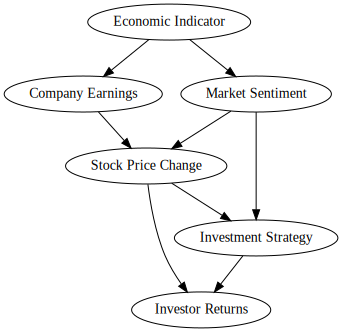

In [6]:
# 创建进一步改进的金融领域贝叶斯网络的图形表示
 
# 定义节点全称
further_improved_full_names = {
    "EI": "Economic Indicator",
    "MS": "Market Sentiment",
    "CE": "Company Earnings",
    "SPC": "Stock Price Change",
    "IS": "Investment Strategy",
    "IR": "Investor Returns"
}

# 创建有向图
further_improved_dot = Digraph()

# 添加节点
for node in further_improved_full_names:
    further_improved_dot.node(node, further_improved_full_names[node])

# 添加边
for start, end in model.edges:
    further_improved_dot.edge(start, end)

# 返回图形对象
further_improved_dot

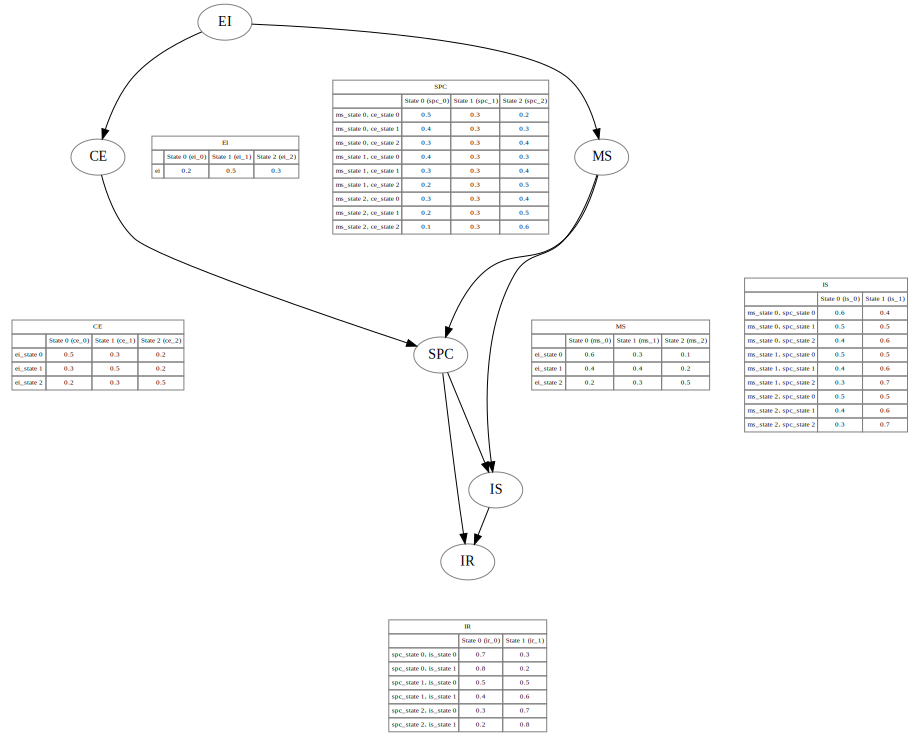

In [7]:
#%load_ext autoreload
#%autoreload 2

from graphviz_helper import extract_cpd_details
from graphviz_helper import render_graph
from graphviz_helper import render_graph_probabilities
structures, variables=extract_cpd_details(model)
g = render_graph(structures, variables)
g = render_graph_probabilities(g, variables)
g
  

In [8]:
# Checking independcies of a node
model.local_independencies("SPC")

(SPC ⟂ EI | MS, CE)

In [9]:
# Listing all Independencies
model.get_independencies()

(IS ⟂ EI | MS, CE)
(IS ⟂ EI, CE | MS, SPC)
(IS ⟂ EI | MS, CE, IR)
(IS ⟂ EI | MS, CE, SPC)
(IS ⟂ EI, CE | SPC, MS, IR)
(IS ⟂ CE | EI, MS, SPC)
(IS ⟂ EI | SPC, MS, CE, IR)
(IS ⟂ CE | EI, SPC, MS, IR)
(MS ⟂ CE | EI)
(MS ⟂ IR | IS, SPC)
(MS ⟂ IR | IS, CE, SPC)
(MS ⟂ IR | IS, EI, SPC)
(MS ⟂ IR | IS, EI, CE, SPC)
(CE ⟂ MS | EI)
(CE ⟂ IR | IS, SPC)
(CE ⟂ IS, IR | MS, SPC)
(CE ⟂ IR | IS, MS, SPC)
(CE ⟂ IR | IS, EI, SPC)
(CE ⟂ IS | SPC, MS, IR)
(CE ⟂ IS, IR | EI, MS, SPC)
(CE ⟂ IR | IS, EI, MS, SPC)
(CE ⟂ IS | EI, SPC, MS, IR)
(IR ⟂ EI, CE, MS | IS, SPC)
(IR ⟂ EI | MS, CE)
(IR ⟂ EI, CE | MS, SPC)
(IR ⟂ EI | IS, MS, CE)
(IR ⟂ EI, CE | IS, MS, SPC)
(IR ⟂ EI, MS | IS, CE, SPC)
(IR ⟂ MS, CE | IS, EI, SPC)
(IR ⟂ EI | MS, CE, SPC)
(IR ⟂ CE | EI, MS, SPC)
(IR ⟂ EI | IS, MS, CE, SPC)
(IR ⟂ CE | IS, EI, MS, SPC)
(IR ⟂ MS | IS, EI, CE, SPC)
(EI ⟂ IR | IS, SPC)
(EI ⟂ IS, IR, SPC | MS, CE)
(EI ⟂ IS, IR | MS, SPC)
(EI ⟂ IR, SPC | IS, MS, CE)
(EI ⟂ IR | IS, MS, SPC)
(EI ⟂ IR | IS, CE, SPC)
(EI ⟂ IS, SPC | MS

In [10]:
print(model.get_cpds()[3])

+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| MS     | MS(0) | MS(0) | MS(0) | MS(1) | MS(1) | MS(1) | MS(2) | MS(2) | MS(2) |
+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| CE     | CE(0) | CE(1) | CE(2) | CE(0) | CE(1) | CE(2) | CE(0) | CE(1) | CE(2) |
+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| SPC(0) | 0.5   | 0.4   | 0.3   | 0.4   | 0.3   | 0.2   | 0.3   | 0.2   | 0.1   |
+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| SPC(1) | 0.3   | 0.3   | 0.3   | 0.3   | 0.3   | 0.3   | 0.3   | 0.3   | 0.3   |
+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| SPC(2) | 0.2   | 0.3   | 0.4   | 0.3   | 0.4   | 0.5   | 0.4   | 0.5   | 0.6   |
+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+


## 概率推理  

1. 就是计算各种条件概率和变量概率。比如给定信息E,求Y的后验分布$P(Y=1|E=e)$
2. 比如上面的例子中，如何计算P(IR=1|EI=2),即经济指标正面的时候投资收益时正的概率。

要推导 $P(IR = ir \,|\, EI = ei)$，我们需要使用贝叶斯网络的性质和条件概率的基本原则。在贝叶斯网络中，每个节点的概率依赖于其父节点，这种依赖关系可以帮助我们简化条件概率的计算。

我们的目标是计算给定经济指标（EI）状态下投资者回报（IR）的概率。贝叶斯网络的结构表明，EI 间接通过多个路径影响 IR。具体来说，EI 影响市场情绪（MS）和公司收益（CE），这些又影响股票价格变化（SPC）和投资策略（IS），最终影响投资者回报（IR）。

基于网络结构和概率表达式，我们可以将 $P(IR = ir \,|\, EI = ei)$ 分解为以下形式：

$$
P(IR = ir \,|\, EI = ei) = \sum_{ms} \sum_{ce} \sum_{spc} \sum_{is} P(IR = ir, MS = ms, CE = ce, SPC = spc, IS = is \,|\, EI = ei)
$$

进一步地，根据贝叶斯网络的条件独立性，我们可以将上述概率分解为：

$$
\begin{align*}
P(IR = ir \,|\, EI = ei) = & \sum_{ms} \sum_{ce} \sum_{spc} \sum_{is} \\
& P(IR = ir \,|\, SPC = spc, IS = is) \times \\
& P(IS = is \,|\, MS = ms, SPC = spc) \times \\
& P(SPC = spc \,|\, MS = ms, CE = ce) \times \\
& P(CE = ce \,|\, EI = ei) \times \\
& P(MS = ms \,|\, EI = ei)
\end{align*}
$$

在这个表达式中：
- $P(IR = ir \,|\, SPC = spc, IS = is)$、$P(IS = is \,|\, MS = ms, SPC = spc)$、$P(SPC = spc \,|\, MS = ms, CE = ce)$、$P(CE = ce \,|\, EI = ei)$ 和 $P(MS = ms \,|\, EI = ei)$ 可以直接从相应的条件概率表（CPD）中获取。
- 求和操作（Σ）考虑了所有可能的中间状态（ms, ce, spc, is）的组合。

这就是用贝叶斯网络推导 $P(IR = ir \,|\, EI = ei)$ 的过程。由于涉及多个变量和求和，实际的计算可能会相当复杂。

EI 有 3 个状态。MS 有 3 个状态。CE 有 3 个状态。SPC 有 3 个状态。IS 有 2 个状态。所以总的求和操作将涉及 3×3×3×3×2=162 个不同的状态组合。通常对大的模型，需要进行优化，通常的算法包括：

+ 变量消除
+ Junction Tree方法

In [11]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

# 对不同的 EI 状态计算 IR 的条件概率
result_ei_0 = infer.query(variables=["IR"], evidence={"EI": 0})
result_ei_1 = infer.query(variables=["IR"], evidence={"EI": 1})
result_ei_2 = infer.query(variables=["IR"], evidence={"EI": 2})

# 输出结果
print("P(IR | EI=0):", result_ei_0)
print("P(IR | EI=1):", result_ei_1)
print("P(IR | EI=2):", result_ei_2)

P(IR | EI=0): +-------+-----------+
| IR    |   phi(IR) |
+=======+===========+
| IR(0) |    0.4914 |
+-------+-----------+
| IR(1) |    0.5086 |
+-------+-----------+
P(IR | EI=1): +-------+-----------+
| IR    |   phi(IR) |
+=======+===========+
| IR(0) |    0.4653 |
+-------+-----------+
| IR(1) |    0.5347 |
+-------+-----------+
P(IR | EI=2): +-------+-----------+
| IR    |   phi(IR) |
+=======+===========+
| IR(0) |    0.4183 |
+-------+-----------+
| IR(1) |    0.5817 |
+-------+-----------+


In [12]:
from pgmpy.inference import BeliefPropagation

belief_propagation = BeliefPropagation(model)

# 查询在 EI=0 的情况下 IR 的条件概率
result = belief_propagation.query(variables=['IR'], evidence={'EI': 2})
print(result)

+-------+-----------+
| IR    |   phi(IR) |
+=======+===========+
| IR(0) |    0.4183 |
+-------+-----------+
| IR(1) |    0.5817 |
+-------+-----------+


####  观测数据估计因果效应--后门准则 
1.
<div style="display: flex; justify-content: center;">    
  <img src="./figures/twopath.png" alt="onechain" style="width: 10%; margin-right: 10%;">    
  <img src="./figures/doz.png" alt="twopath" style="width: 20%;">    
</div>

+  如果X是Z到Y的后门集合，则有
+  $E(Y|do(Z=z))=\sum_{x}E(Y|x,Z=z)P(x)$
+ 因果效应
   $$\begin{array}{rl}&E(Y|do(Z=1)-E(Y|do(Z=0))\\&=\sum_{x}E(Y|x,Z=1)P(x)-\sum_{x}E(Y|x,Z=0)P(x)\end{array}$$
+ **Z的父亲集合是一个后面集合**
 


####  例子

+ 如果我们通过手段营造好的市场情绪，使得其不依赖与经济条件。市场情绪对投资者收益的因果效应是多少？

$$P(IR=1|do(MS=2))-P(IR=1|do(MS=0))$$

+ 如果经济指标不好的时候(EI=0),我们通过手段营造好的市场情绪(MS=2)，使得其不依赖与经济条件。经济不好时，市场情绪对投资者收益的因果效应是多少？

$$P(IR=1|do(MS=2),EI=0)-P(IR=1|do(MS=0),EI=0)$$



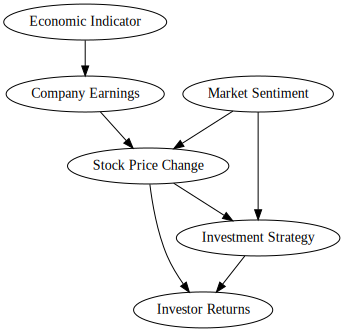

In [13]:
# 创建进一步改进的金融领域贝叶斯网络的图形表示
 
# 定义节点全称
further_improved_full_names = {
    "EI": "Economic Indicator",
    "MS": "Market Sentiment",
    "CE": "Company Earnings",
    "SPC": "Stock Price Change",
    "IS": "Investment Strategy",
    "IR": "Investor Returns"
}

# 创建有向图 
doMS_dot = Digraph()

# 添加节点
for node in further_improved_full_names:
    doMS_dot.node(node, further_improved_full_names[node])
    

# 添加边
for start, end in model.edges:
    if end!="MS":
        doMS_dot.edge(start, end)

doMS_dot        
 

In [14]:
from pgmpy.inference import CausalInference
infer_adjusted = CausalInference(model)
print(infer_adjusted.query(variables=["IR"], do={"MS": 2}))
print(infer_adjusted.query(variables=["IR"], do={"MS": 0}))

print(infer_adjusted.query(variables=["IR"], do={"MS": 2},evidence={'EI': 0}))
print(infer_adjusted.query(variables=["IR"], evidence={'EI': 0}))

  0%|          | 0/3 [00:00<?, ?it/s]

+-------+-----------+
| IR    |   phi(IR) |
+=======+===========+
| IR(0) |    0.3980 |
+-------+-----------+
| IR(1) |    0.6020 |
+-------+-----------+


  0%|          | 0/3 [00:00<?, ?it/s]

+-------+-----------+
| IR    |   phi(IR) |
+=======+===========+
| IR(0) |    0.5040 |
+-------+-----------+
| IR(1) |    0.4960 |
+-------+-----------+


  0%|          | 0/1 [00:00<?, ?it/s]

+-------+-----------+
| IR    |   phi(IR) |
+=======+===========+
| IR(0) |    0.4126 |
+-------+-----------+
| IR(1) |    0.5874 |
+-------+-----------+
+-------+-----------+
| IR    |   phi(IR) |
+=======+===========+
| IR(0) |    0.4914 |
+-------+-----------+
| IR(1) |    0.5086 |
+-------+-----------+


### 因果结构学习

+ 金融因果通常暗含相关，说明相关中蕴含因果的信息。
+ 在一定设定下，可以通过数据学习因果结构。

+ 例子：随机实验数据

    + 在药效评估的双盲随机实验中，$X$是是否接受处理，$Y$是是否有好转。
    + 如果实验数据发现$X$和$Y$独立，则我们能得出$X\quad Y$之间没有因果关系。
    + 如果实验数据说明$X\not\perp\kern-7pt\perp Y$,则我们大概可以认为：$X\to Y$，即$X$是$Y$的原因。
    
+ 那么从观测数据出发呢？

   + 两个变量独立说明什么呢？
   + 两个变量不独立说明什么呢？
   
+ 假设
+ 算法,PC，Hill-Climb Search等等

https://pgmpy.org/detailed_notebooks/10.%20Learning%20Bayesian%20Networks%20from%20Data.html

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

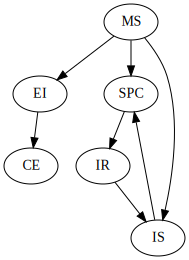

In [15]:
from pgmpy.sampling import BayesianModelSampling
from pgmpy.estimators import PC 

samples = model.simulate(n_samples=5000)
#samples = BayesianModelSampling(model).forward_sample(size=int(1e4))

est = PC(samples)
estimated_model = est.estimate(variant="orig", max_cond_vars=5) 
# 创建有向图
 
dot = Digraph()

  
for start, end in list(estimated_model.edges()):
    dot.edge(start, end)

# 显示图形
dot

  0%|          | 0/10000 [00:00<?, ?it/s]

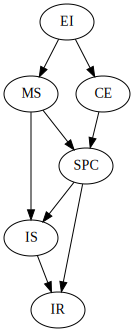

In [17]:
from pgmpy.estimators import HillClimbSearch, BicScore,K2Score
 
 
 

# 初始化 BicScore 对象
#scoring_method = BicScore(samples)
scoring_method = K2Score(data=samples)
# 初始化 HillClimbSearch 对象
hc_search = HillClimbSearch(samples)

# 执行搜索
best_model = hc_search.estimate(scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4)
)

# best_model 就是学习到的贝叶斯网络结构
dot = Digraph()

  
for start, end in list(best_model.edges()):
    dot.edge(start, end)

# 显示图形
dot

### Learning Tree-augmented Naive Bayes (TAN) Structure from Data

https://pgmpy.org/examples/Structure%20Learning%20with%20TAN.html

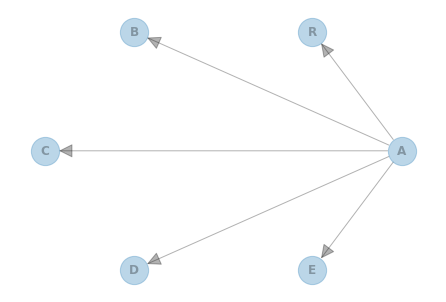

In [59]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork

# class variable is A and feature variables are B, C, D, E and R
model = BayesianNetwork([("A", "R"), ("A", "B"), ("A", "C"), ("A", "D"), ("A", "E")])
nx.draw_circular(
    model, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold"
)
plt.show()

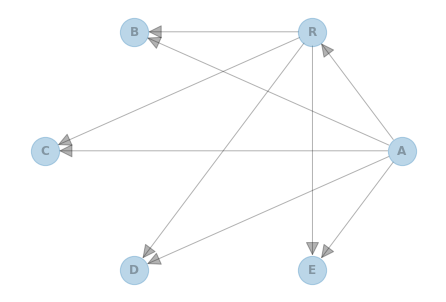

In [60]:
#add interaction between the features
# feature R correlates with other features
model.add_edges_from([("R", "B"), ("R", "C"), ("R", "D"), ("R", "E")])
nx.draw_circular(
    model, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold"
)
plt.show()

In [61]:
# parameterize our graph to create a Bayesian network

from pgmpy.factors.discrete import TabularCPD

# add CPD to each edge
cpd_a = TabularCPD("A", 2, [[0.7], [0.3]])
cpd_r = TabularCPD(
    "R", 3, [[0.6, 0.2], [0.3, 0.5], [0.1, 0.3]], evidence=["A"], evidence_card=[2]
)
cpd_b = TabularCPD(
    "B",
    3,
    [
        [0.1, 0.1, 0.2, 0.2, 0.7, 0.1],
        [0.1, 0.3, 0.1, 0.2, 0.1, 0.2],
        [0.8, 0.6, 0.7, 0.6, 0.2, 0.7],
    ],
    evidence=["A", "R"],
    evidence_card=[2, 3],
)
cpd_c = TabularCPD(
    "C",
    2,
    [[0.7, 0.2, 0.2, 0.5, 0.1, 0.3], [0.3, 0.8, 0.8, 0.5, 0.9, 0.7]],
    evidence=["A", "R"],
    evidence_card=[2, 3],
)
cpd_d = TabularCPD(
    "D",
    3,
    [
        [0.3, 0.8, 0.2, 0.8, 0.4, 0.7],
        [0.4, 0.1, 0.4, 0.1, 0.1, 0.1],
        [0.3, 0.1, 0.4, 0.1, 0.5, 0.2],
    ],
    evidence=["A", "R"],
    evidence_card=[2, 3],
)
cpd_e = TabularCPD(
    "E",
    2,
    [[0.5, 0.6, 0.6, 0.5, 0.5, 0.4], [0.5, 0.4, 0.4, 0.5, 0.5, 0.6]],
    evidence=["A", "R"],
    evidence_card=[2, 3],
)
model.add_cpds(cpd_a, cpd_r, cpd_b, cpd_c, cpd_d, cpd_e)

In [62]:
# generate sample data from our Bayesian network

from pgmpy.sampling import BayesianModelSampling

# sample data from BN
inference = BayesianModelSampling(model)
df_data = inference.forward_sample(size=10000)
print(df_data)

  0%|          | 0/6 [00:00<?, ?it/s]

      A  R  B  C  D  E
0     0  0  2  1  0  1
1     0  0  2  0  0  0
2     0  0  2  1  2  0
3     0  0  2  0  1  0
4     0  0  2  1  1  1
...  .. .. .. .. .. ..
9995  0  0  2  0  2  0
9996  0  1  0  1  2  0
9997  0  2  2  1  1  0
9998  0  1  2  1  0  1
9999  0  0  2  0  1  0

[10000 rows x 6 columns]


Building tree:   0%|          | 0/15.0 [00:00<?, ?it/s]

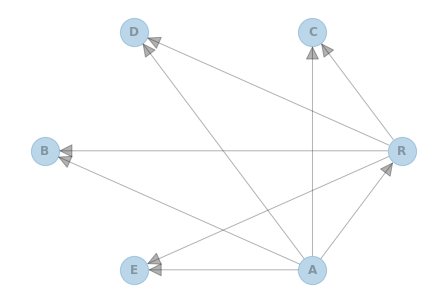

In [63]:
# we are ready to learn the TAN structure from sample data

from pgmpy.estimators import TreeSearch

# learn graph structure
est = TreeSearch(df_data, root_node="R")
dag = est.estimate(estimator_type="tan", class_node="A")
nx.draw_circular(
    dag, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold"
)
plt.show()

In [64]:
# parameterize the learned graph from data

from pgmpy.estimators import BayesianEstimator

# there are many choices of parametrization, here is one example
model = BayesianNetwork(dag.edges())
model.fit(
    df_data, estimator=BayesianEstimator, prior_type="dirichlet", pseudo_counts=0.1
)
model.get_cpds()

[<TabularCPD representing P(R:3 | A:2) at 0x25c8c8bc880>,
 <TabularCPD representing P(C:2 | A:2, R:3) at 0x25c8c8bc460>,
 <TabularCPD representing P(D:3 | A:2, R:3) at 0x25c8c8bc700>,
 <TabularCPD representing P(B:3 | A:2, R:3) at 0x25c8c8bc3d0>,
 <TabularCPD representing P(E:2 | A:2, R:3) at 0x25c8c8bc820>,
 <TabularCPD representing P(A:2) at 0x25c8c8bc790>]

## 微软提供的 dowhy 包 

包容两种框架
 
Much like machine learning libraries have done for prediction, “DoWhy” is a Python library that aims to spark causal thinking and analysis. DoWhy provides a principled four-step interface for causal inference that focuses on explicitly modeling causal assumptions and validating them as much as possible.

### Getting started with DoWhy: A simple example
https://www.pywhy.org/dowhy/v0.2/example_notebooks/dowhy_simple_example.html

In [ ]:
import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
import dowhy.datasets

In [48]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=10000,
        treatment_is_binary=True)
df = data["df"]
print(df.head())
print(data["dot_graph"])
print("\n")
print(data["gml_graph"])

         X0   Z0        Z1        W0        W1        W2        W3        W4  \
0 -0.882263  0.0  0.489093  0.797452 -1.331676 -0.356493  0.350244 -0.929009   
1  0.784157  1.0  0.482792 -2.116445  0.101011  0.141922 -1.766358  0.180524   
2 -2.105772  0.0  0.061199  0.638724 -0.028387  0.201214 -2.837375  0.976573   
3 -1.791094  1.0  0.418210 -0.053402 -1.690553  0.253094 -1.175335 -1.106669   
4  1.052922  0.0  0.425783 -2.410794  0.732149  0.326090 -0.213657 -1.910067   

      v0         y  
0  False -4.284370  
1   True  5.744739  
2   True -1.358454  
3   True -6.200225  
4  False -4.079390  
digraph {v0->y;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}


graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"]node[ id "v0" label "v0"]edge[source "v0" target

In [49]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']


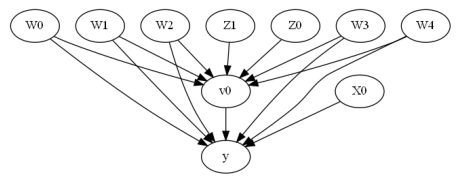

In [50]:
model.view_model()

In [54]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier.auto_identifier:Causal effect can be identified.
INFO:dowhy.causal_identifier.auto_identifier:Instrumental variables for treatment and outcome:['Z1', 'Z0']
INFO:dowhy.causal_identifier.auto_identifier:Frontdoor variables for treatment and outcome:[]


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W4,W2,W3,W0])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W4,W2,W3,W0,U) = P(y|v0,W1,W4,W2,W3,W0)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₁  Z₀]    ⎝d[Z₁  Z₀]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [55]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_model:propensity_score_stratification
INFO:dowhy.causal_estimator:Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W4+W2+W3+W0
INFO:dowhy.causal_estimator:'num_strata' selected as 500.0
INFO:dowhy.causal_estimator:No strata found with at least 10 data points. Selecting fewer number of strata
INFO:dowhy.causal_estimator:'num_strata' selected as 250
INFO:dowhy.causal_estimator:Less than half the strata have at least 10 data points. Selecting fewer number of strata.
INFO:dowhy.causal_estimator:'num_strata' selected as 125


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W4,W2,W3,W0])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W4,W2,W3,W0,U) = P(y|v0,W1,W4,W2,W3,W0)

## Realized estimand
b: y~v0+W1+W4+W2+W3+W0
Target units: ate

## Estimate
Mean value: 10.84836430380342

Causal Estimate is 10.84836430380342


### Basic Example for Graphical Causal Model-Based Intervention

https://www.pywhy.org/dowhy/v0.9.1/user_guide/gcm_based_inference/index.html


In [40]:
import networkx as nx
causal_graph = nx.DiGraph([("X","Y"),("Y","Z")])

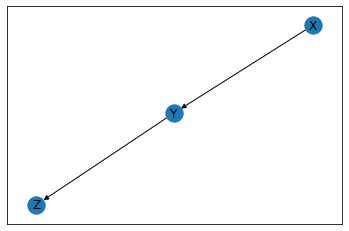

In [41]:
# 使用Kamada-Kawai 布局
pos = nx.kamada_kawai_layout(causal_graph)
nx.draw_networkx(causal_graph,pos)

In [42]:
from dowhy import gcm
causal_model = gcm.StructuralCausalModel(causal_graph)

In [43]:
import numpy as np, pandas as pd

X = np.random.normal(loc=0, scale=1, size=1000)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=1000)
Z = 3 * Y + np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(data=dict(X=X, Y=Y, Z=Z))
data.head()

,X,Y,Z
0,1.684879,1.588641,3.598353
1,1.287503,2.427104,5.131021
2,1.297011,3.416537,9.073677
3,1.044459,2.752921,8.059086
4,1.080276,2.934543,8.897639


In [44]:
gcm.auto.assign_causal_mechanisms(causal_model, data)

#### Fit Structural Causal Model (SCM)

In [46]:

gcm.fit(causal_model, data)

Fitting causal mechanism of node Z: 100%|███████████████████████████████████████████████| 3/3 [00:00<00:00, 487.75it/s]


####  Answering a causal query 


In [47]:
samples = gcm.interventional_samples(causal_model,
                                     {'Y': lambda y: 2.34 },
                                     num_samples_to_draw=1000)
samples.head()

,X,Y,Z
0,-0.346284,2.34,8.197258
1,-1.035274,2.34,7.343487
2,-0.346284,2.34,6.728254
3,-1.190551,2.34,6.968343
4,0.874725,2.34,6.847774


In [57]:
samples.mean()

X    0.003694
Y    2.340000
Z    7.088439
dtype: float64